# Import libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

# Import Dataset

In [44]:
df = pd.read_csv('../Dataset/songs_normalize_preprocessed.csv')
df

,Unnamed: 0,popularity,key,year,mode,liveness,tempo,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,duration_ms,valence,genre
0,0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272,pop
1,1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118,"rock, pop"
2,2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441,"pop, country"
3,3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615,"rock, metal"
4,4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1722,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727,pop
1723,1723,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122,pop
1724,1724,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704,"hip hop, country"
1725,1725,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946,pop


## Feature Selection

In [45]:
df.drop(columns=['Unnamed: 0', 'genre', 'popularity', 'mode', 'tempo', 'duration_ms', 'key', 'year'], inplace=True)


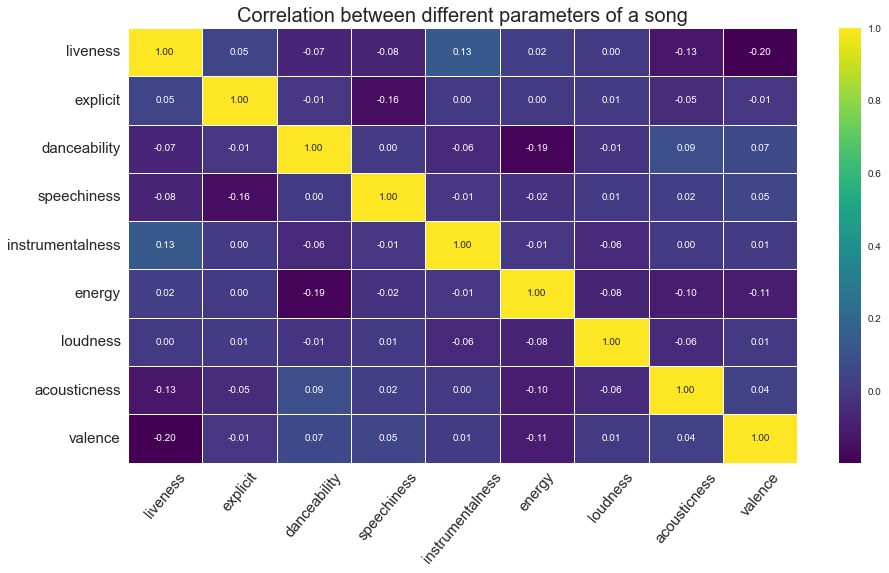

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

# Withoout PCA

## Implement KMeans

In [55]:
kmeansInertias = []
c_centers_list = []
clusterCenters_lst = []
for k in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(df)
    clusterCenters = kmeans.cluster_centers_
    clusterCenters_lst.append(clusterCenters)
    kmeansInertias.append(kmeans.inertia_)
    centroidsTable = pd.DataFrame(clusterCenters, columns=df.columns[:17], index = ['C'+str(i+1) for i in range(len(clusterCenters))])
    
    display(centroidsTable)

,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.626904,0.443743,0.751287,1.000000e+00,0.127033,0.110880,0.004398,0.190685,0.402523
C2,0.652033,0.545572,0.750484,6.661338e-16,0.129260,0.117989,0.004105,0.184153,0.385004


,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.630833,0.706818,0.748368,1.000000e+00,0.117167,0.112688,0.005241,0.182565,0.395889
C2,0.652033,0.545572,0.750484,6.661338e-16,0.129260,0.117989,0.004105,0.184153,0.385004
C3,0.622164,0.126345,0.754810,1.000000e+00,0.138936,0.108698,0.003380,0.200481,0.410526


,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.630833,0.706818,0.748368,1.000000e+00,0.117167,0.112688,0.005241,0.182565,0.395889
C2,0.636946,0.303861,0.748492,-2.220446e-16,0.120176,0.125953,0.004489,0.189690,0.384483
C3,0.671584,0.858795,0.753066,-4.440892e-16,0.141031,0.107669,0.003608,0.176977,0.385680
C4,0.622164,0.126345,0.754810,1.000000e+00,0.138936,0.108698,0.003380,0.200481,0.410526


,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.630833,0.706818,0.748368,1.000000e+00,0.117167,0.112688,0.005241,0.182565,0.395889
C2,0.627473,0.486577,0.742572,-3.330669e-16,0.124105,0.127248,0.005485,0.192805,0.390018
C3,0.622164,0.126345,0.754810,1.000000e+00,0.138936,0.108698,0.003380,0.200481,0.410526
C4,0.679117,0.895565,0.754188,-4.440892e-16,0.149616,0.109501,0.003381,0.176054,0.385686
C5,0.649343,0.103415,0.757295,1.110223e-16,0.106260,0.116370,0.003037,0.182896,0.376055


,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.628412,0.487879,0.741913,-4.440892e-16,0.125347,0.128831,0.005454,0.192606,0.390287
C2,0.553615,0.780127,0.755142,1.000000e+00,0.105475,0.105462,0.005831,0.200375,0.537710
C3,0.649343,0.103415,0.757295,1.110223e-16,0.106260,0.116370,0.003037,0.182896,0.376055
C4,0.683546,0.643225,0.743964,1.000000e+00,0.123842,0.117850,0.004652,0.168925,0.295436
C5,0.678495,0.897054,0.754959,-3.330669e-16,0.148495,0.107723,0.003398,0.176145,0.385375
C6,0.621509,0.118965,0.754876,1.000000e+00,0.140549,0.108364,0.003467,0.202255,0.414457


,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.664782,0.112152,0.750919,1.000000e+00,0.117142,0.127284,0.004213,0.147815,0.335567
C2,0.627045,0.488182,0.741820,-4.440892e-16,0.123545,0.129043,0.005454,0.192750,0.390796
C3,0.692686,0.685165,0.740168,1.000000e+00,0.121450,0.125844,0.005331,0.153203,0.306569
C4,0.537598,0.187063,0.764496,1.000000e+00,0.175790,0.068230,0.001578,0.330723,0.559186
C5,0.679924,0.896737,0.755055,-3.330669e-16,0.150379,0.107501,0.003398,0.175994,0.384843
C6,0.522771,0.768641,0.760679,1.000000e+00,0.110697,0.094034,0.005460,0.206685,0.550418
C7,0.649343,0.103415,0.757295,1.110223e-16,0.106260,0.116370,0.003037,0.182896,0.376055


,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.484325,0.168746,0.766023,1.000000e+00,0.118028,0.080590,0.003600,0.262839,0.565409
C2,0.704925,0.521645,0.735071,-1.110223e-16,0.128175,0.170032,0.005417,0.123253,0.304022
C3,0.685361,0.589384,0.749881,1.000000e+00,0.117013,0.100211,0.004753,0.199822,0.319882
C4,0.517120,0.437683,0.763934,1.110223e-16,0.125480,0.068009,0.004022,0.324111,0.520326
C5,0.655225,0.096623,0.754357,0.000000e+00,0.104388,0.118254,0.003279,0.160610,0.367366
C6,0.693168,0.090215,0.745022,1.000000e+00,0.153426,0.124778,0.003394,0.169195,0.338875
C7,0.670996,0.908750,0.753822,-3.330669e-16,0.148170,0.100096,0.003653,0.182484,0.397412
C8,0.572422,0.827349,0.750473,1.000000e+00,0.116315,0.128412,0.005571,0.156516,0.471350


,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.723525,0.756706,0.740880,1.000000e+00,0.137865,0.117487,0.005274,0.135859,0.326884
C2,0.650334,0.097438,0.754689,1.110223e-16,0.106186,0.116780,0.003170,0.173943,0.372488
C3,0.712667,0.517689,0.737702,-1.110223e-16,0.131891,0.172550,0.005323,0.121090,0.299380
C4,0.696903,0.087726,0.745499,1.000000e+00,0.138788,0.128247,0.003435,0.168307,0.337966
C5,0.602080,0.482308,0.751258,1.000000e+00,0.070851,0.129334,0.003398,0.221712,0.324304
C6,0.673351,0.912574,0.753987,-2.220446e-16,0.150368,0.098092,0.003723,0.180507,0.392024
C7,0.503927,0.783313,0.763238,1.000000e+00,0.119833,0.099710,0.006230,0.215235,0.566187
C8,0.484823,0.145322,0.767981,1.000000e+00,0.161846,0.055942,0.003908,0.266326,0.579271
C9,0.517947,0.476752,0.757504,2.220446e-16,0.115008,0.074755,0.004271,0.303248,0.520995


## KMeans SSE table

In [58]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,10)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9
SSE,403.563247,323.88525,264.723712,249.732799,238.057979,227.18934,218.527627,210.799459


## Elbow Method

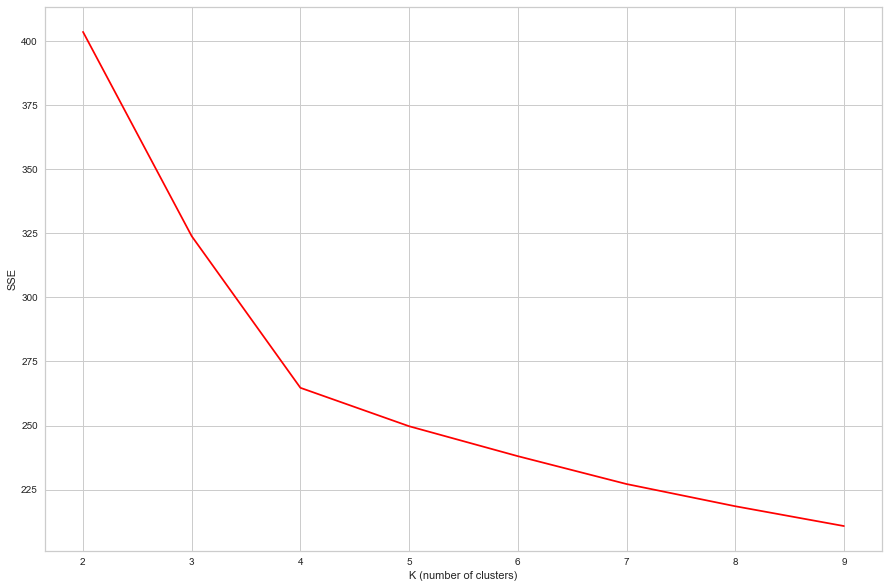

In [59]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Elbow Method / SSE Plot vs Silhouette Analysis Plot

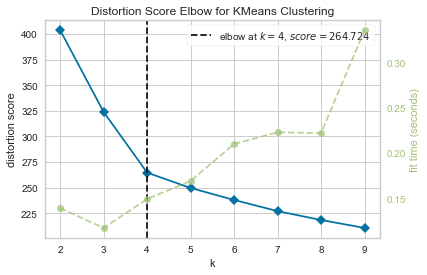

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
km = KMeans(init='k-means++', random_state=0, n_init=12)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() 

## Finding optimal number of clusters

For n_clusters = 2 The average silhouette_score is : 0.46815912833384943
For n_clusters = 3 The average silhouette_score is : 0.374283127547468
For n_clusters = 4 The average silhouette_score is : 0.3057752994809607
For n_clusters = 5 The average silhouette_score is : 0.26839912388554393
For n_clusters = 6 The average silhouette_score is : 0.19649601393563806
For n_clusters = 7 The average silhouette_score is : 0.18057841906480224
For n_clusters = 8 The average silhouette_score is : 0.1763426531329859
For n_clusters = 9 The average silhouette_score is : 0.18518416867774806


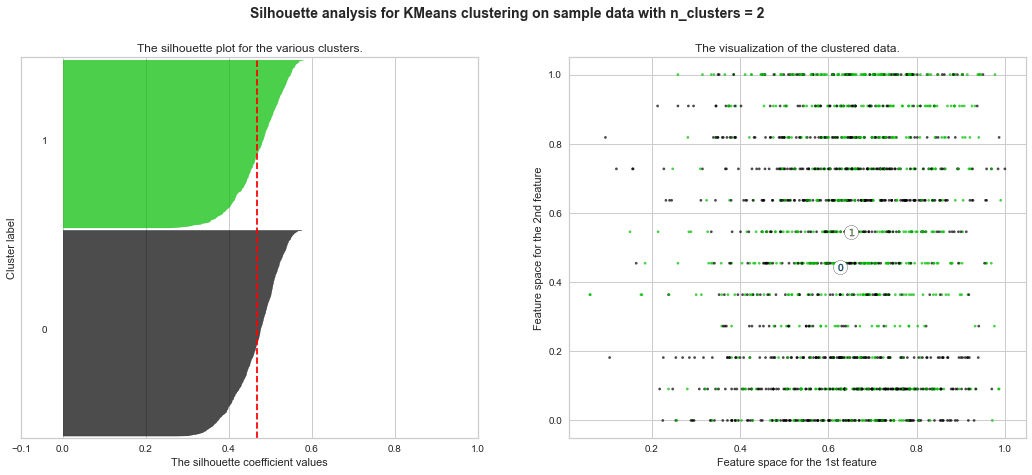

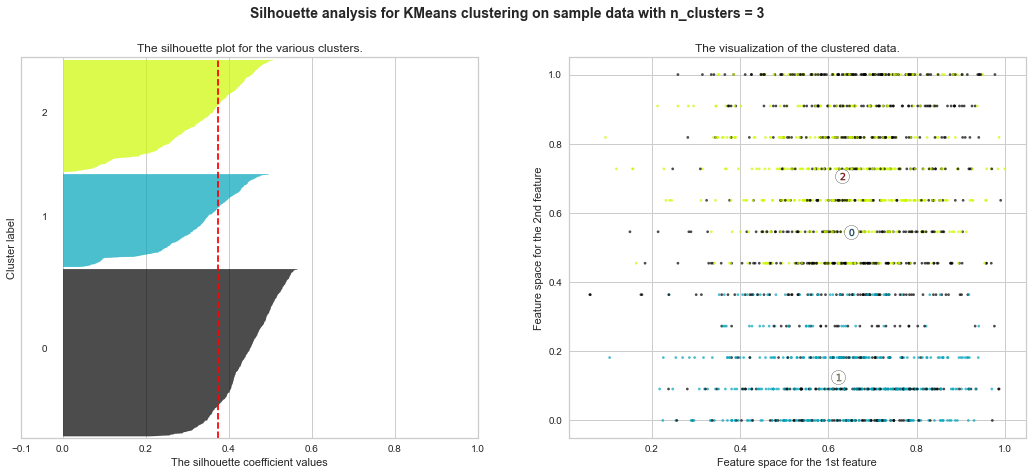

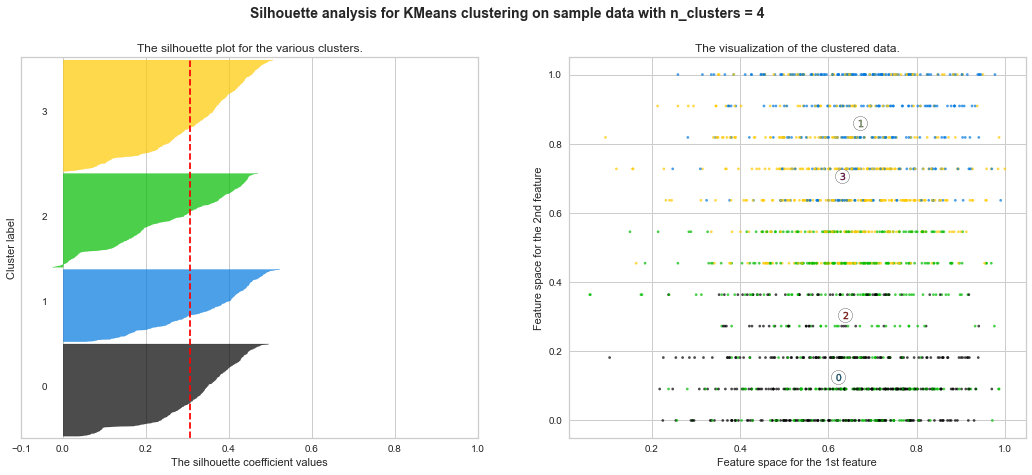

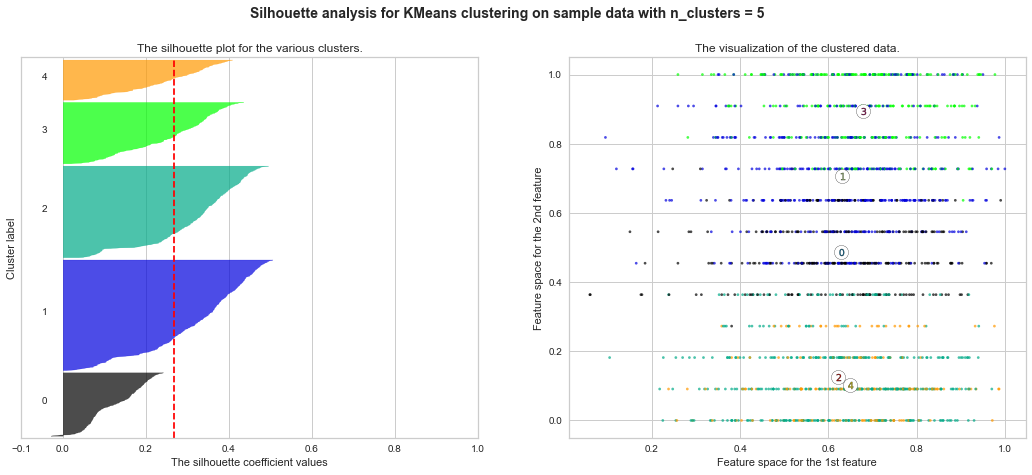

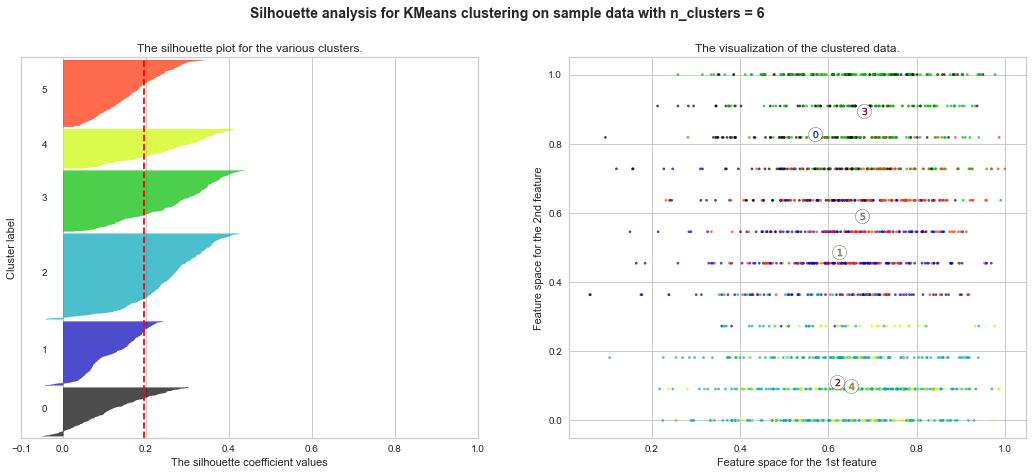

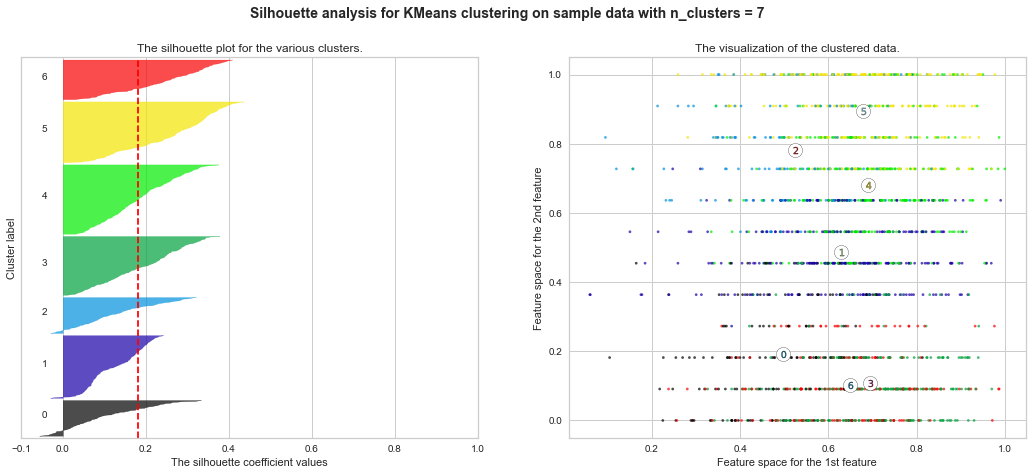

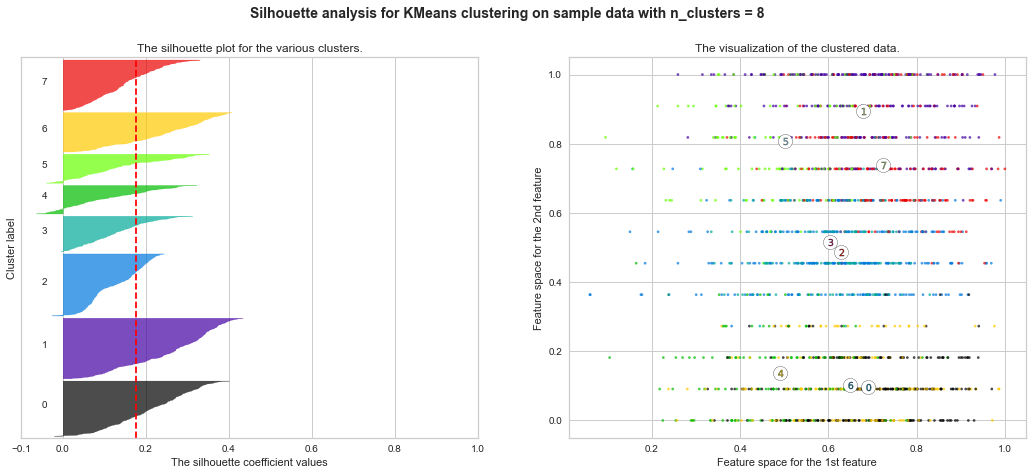

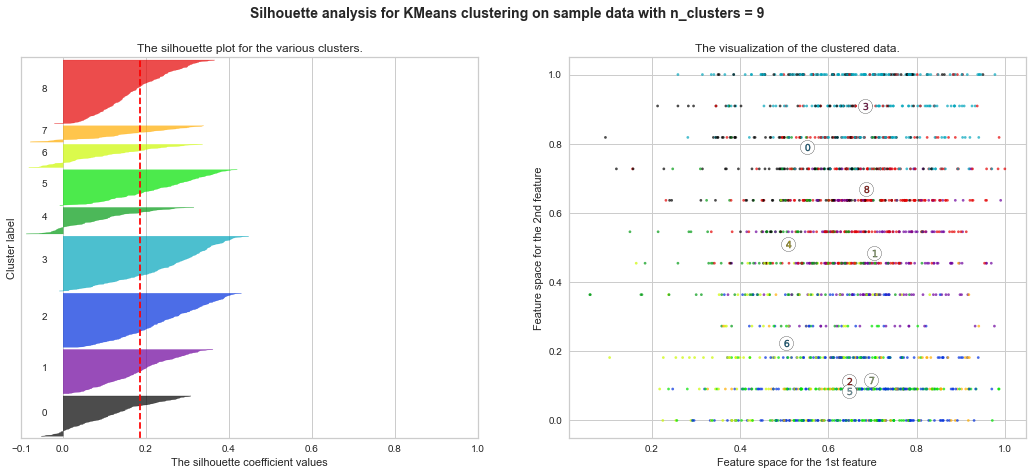

In [61]:
X = df.to_numpy()
silhouette_score_list = []

for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_score_list.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Silhoutte plot

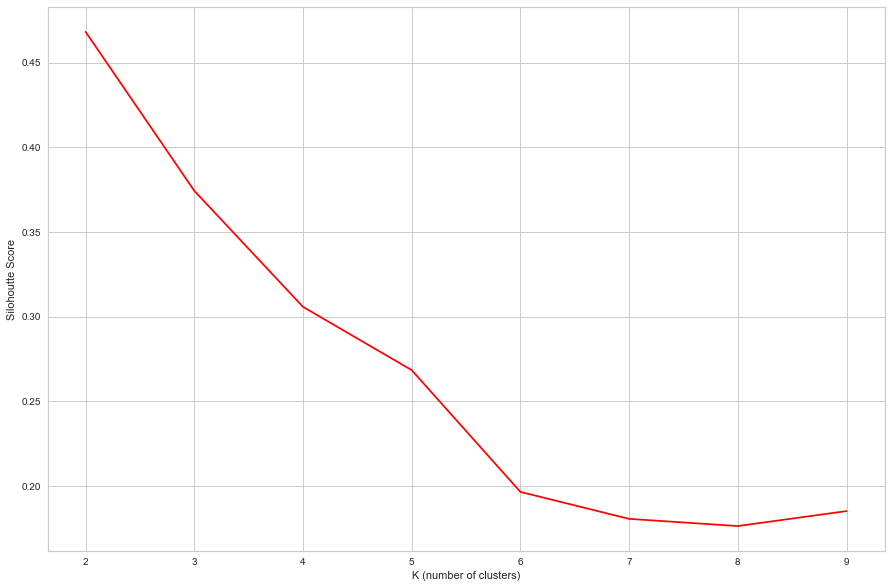

In [62]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), silhouette_score_list, 'x-', color="red")
plt.ylabel('Silohoutte Score')
plt.xlabel('K (number of clusters)')
plt.show()

## Code Book

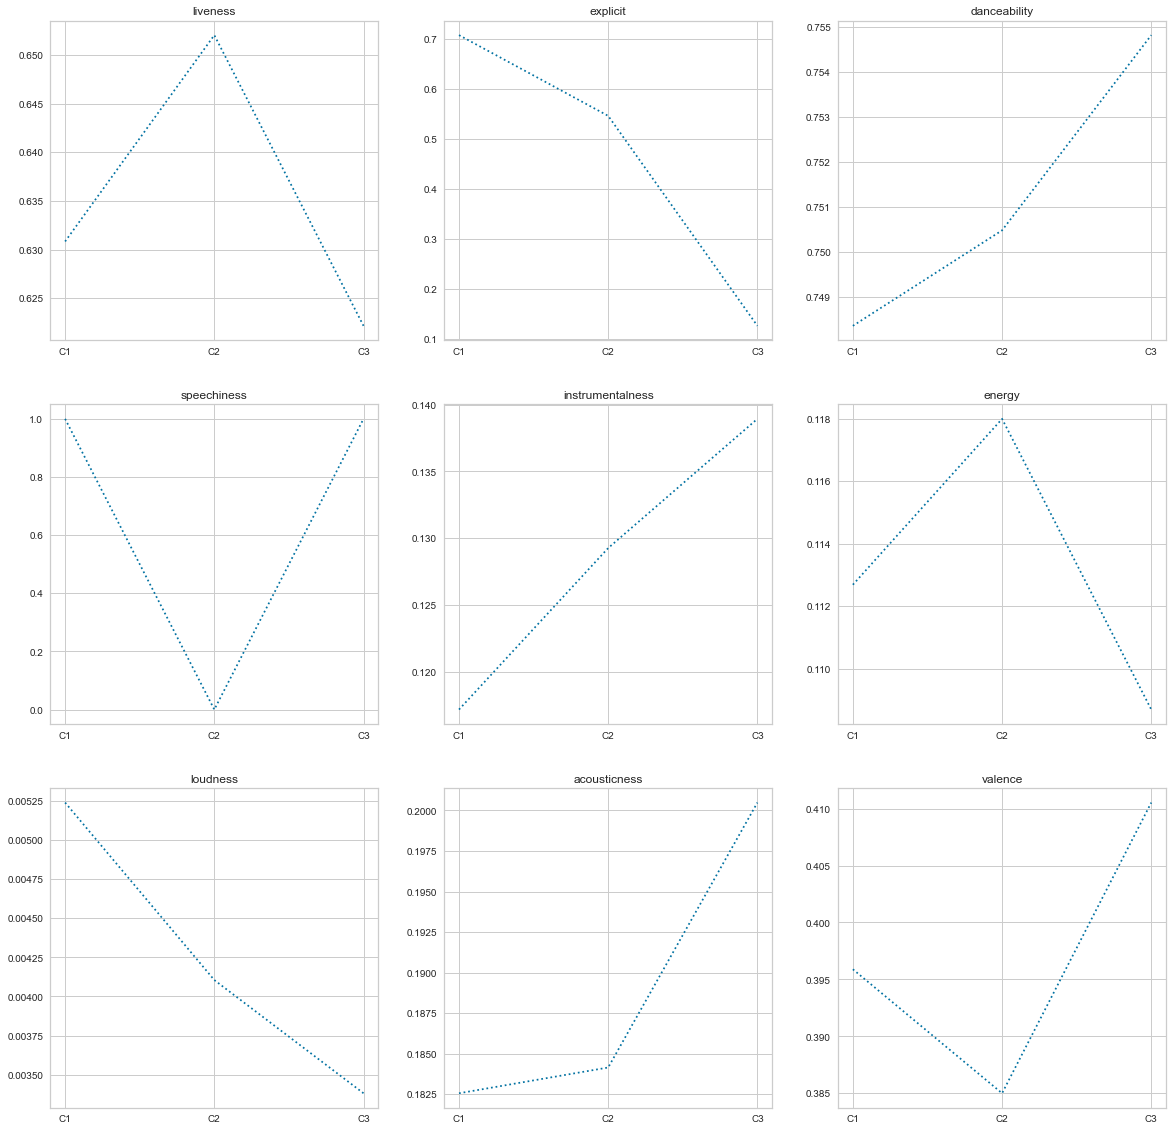

In [66]:
centroidsTable = pd.DataFrame(clusterCenters_lst[1], columns=df.columns[:14], index = ['C'+str(i+1) for i in range(len(clusterCenters_lst[1]))])
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
i = 0
j = 0
for col in centroidsTable.columns:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title = col)
    ax[i, j].plot(centroidsTable[col], linestyle = 'dotted')
    j += 1

# With PCA

## Implementing PCA

In [30]:
Newdf = df.copy()
#Load Data
pca = PCA(2)

#Transform the data
Newdf = pca.fit_transform(df)
data = Newdf.copy()
Newdf = pd.DataFrame(Newdf)

## Implement K-means

In [31]:
kmeansInertias = []
clusterCenters = []
c_centers_list = []
for k in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(Newdf)
    clusterCenters = kmeans.cluster_centers_
    c_centers_list.append(clusterCenters)
    kmeansInertias.append(kmeans.inertia_)

## SSE

In [32]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,10)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9
SSE,178.695591,99.201385,40.267278,25.555274,15.586322,11.945278,8.793574,7.258509


## Elbow Method

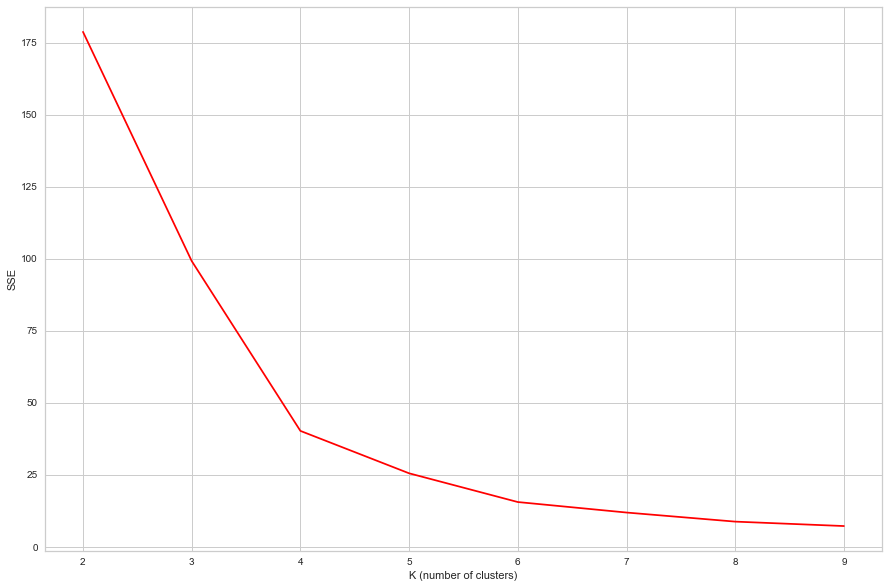

In [33]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Finding optimal number of clusters with PCA

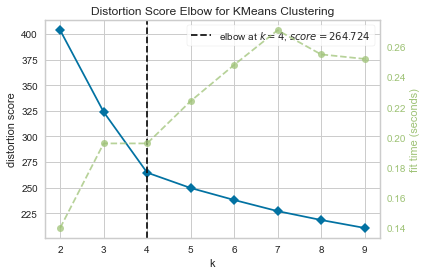

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
km = KMeans(init='k-means++', random_state=0, n_init=12)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() 

For n_clusters = 2 The average silhouette_score is : 0.6656537700581953
For n_clusters = 3 The average silhouette_score is : 0.6766031659316335
For n_clusters = 4 The average silhouette_score is : 0.6709908341154118
For n_clusters = 5 The average silhouette_score is : 0.6910237407335414
For n_clusters = 6 The average silhouette_score is : 0.6568226120877582
For n_clusters = 7 The average silhouette_score is : 0.6552281194419883
For n_clusters = 8 The average silhouette_score is : 0.6460719639014271
For n_clusters = 9 The average silhouette_score is : 0.6590646029476859


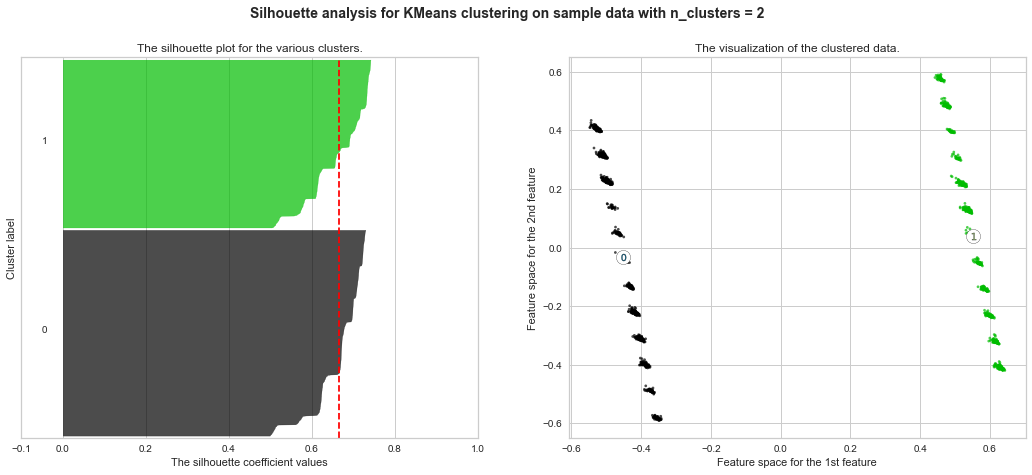

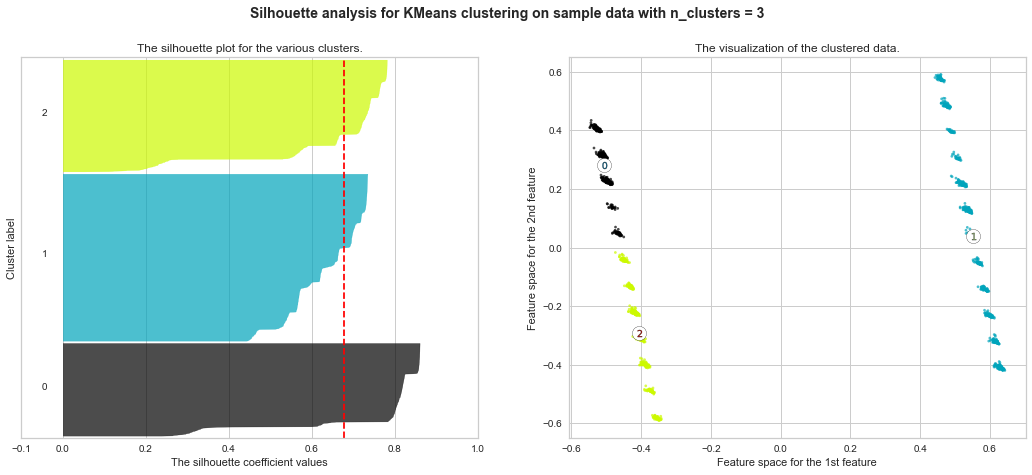

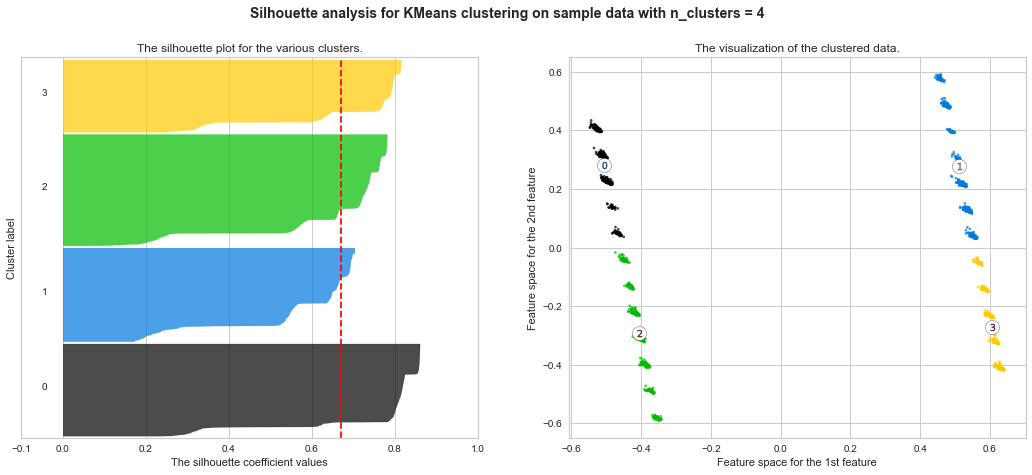

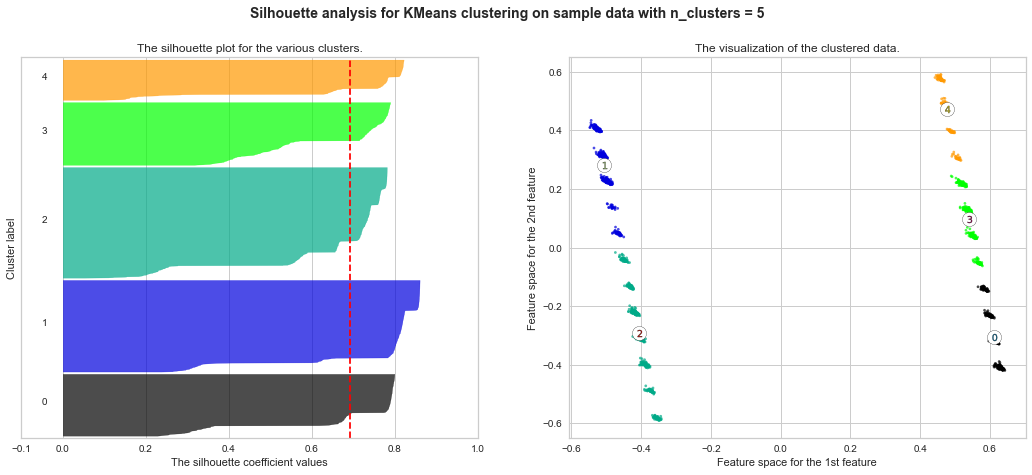

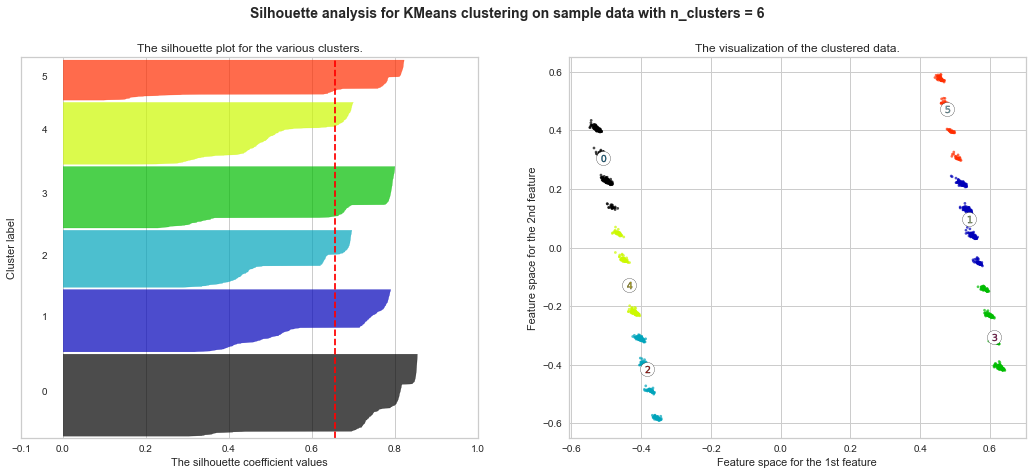

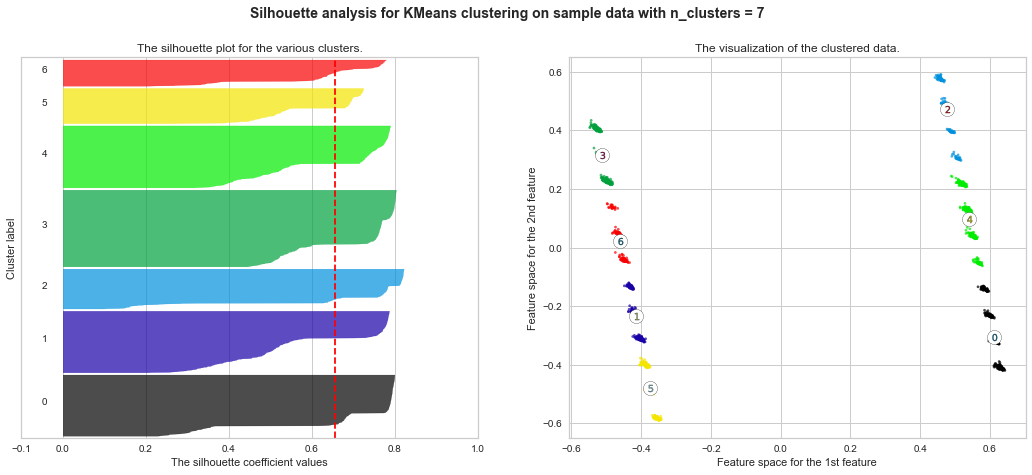

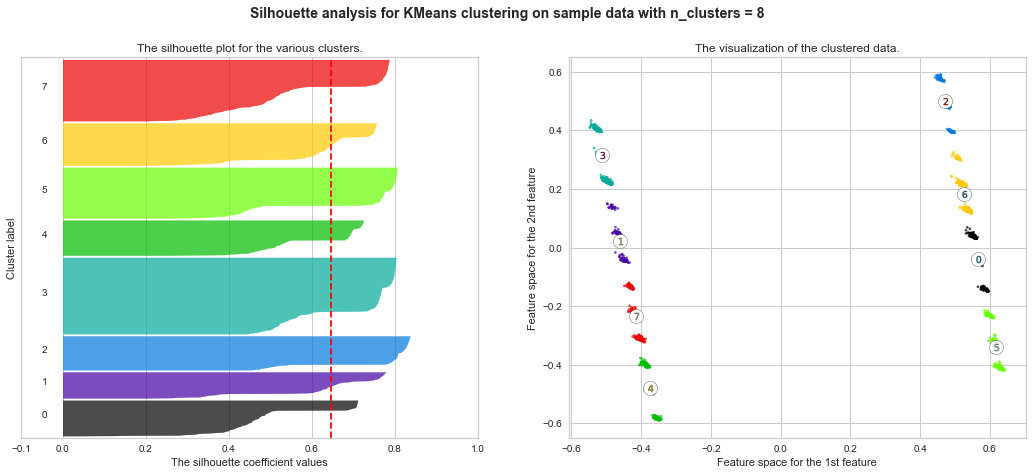

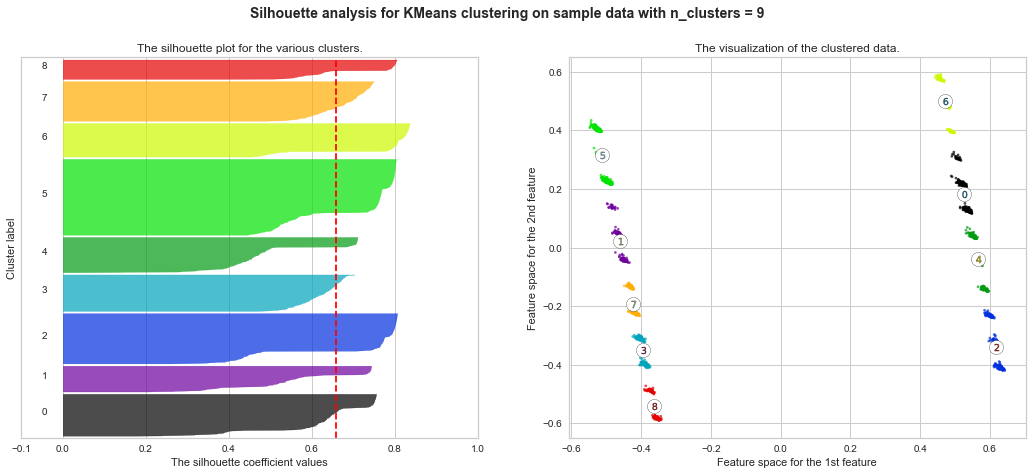

In [16]:
pca = PCA(2)
X = pca.fit_transform(df)

for n_clusters in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Silhoutte plot

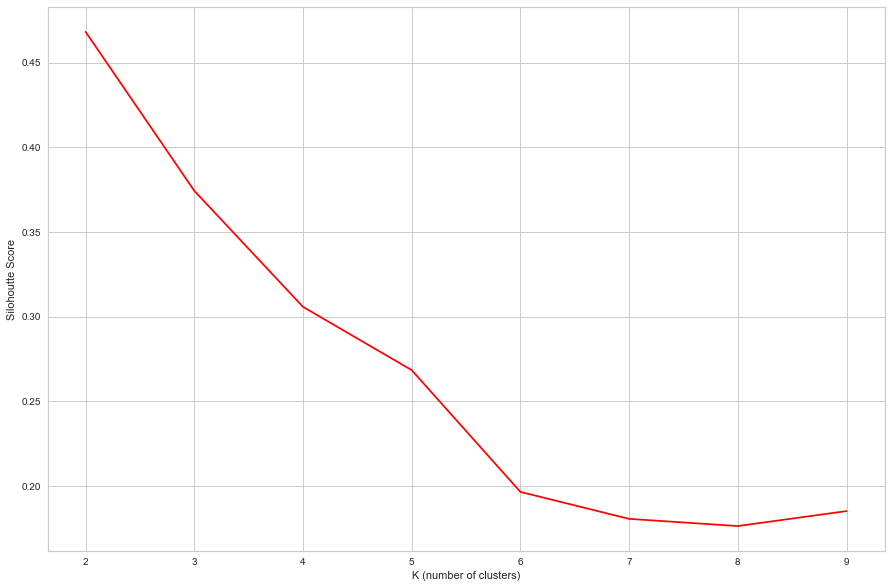

In [17]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), silhouette_score_list, 'x-', color="red")
plt.ylabel('Silohoutte Score')
plt.xlabel('K (number of clusters)')
plt.show()

In [18]:
centroidsTable

,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
C1,0.723525,0.756706,0.740880,1.000000e+00,0.137865,0.117487,0.005274,0.135859,0.326884
C2,0.650334,0.097438,0.754689,1.110223e-16,0.106186,0.116780,0.003170,0.173943,0.372488
C3,0.712667,0.517689,0.737702,-2.220446e-16,0.131891,0.172550,0.005323,0.121090,0.299380
C4,0.696903,0.087726,0.745499,1.000000e+00,0.138788,0.128247,0.003435,0.168307,0.337966
C5,0.602080,0.482308,0.751258,1.000000e+00,0.070851,0.129334,0.003398,0.221712,0.324304
C6,0.673351,0.912574,0.753987,-2.220446e-16,0.150368,0.098092,0.003723,0.180507,0.392024
C7,0.503927,0.783313,0.763238,1.000000e+00,0.119833,0.099710,0.006230,0.215235,0.566187
C8,0.484823,0.145322,0.767981,1.000000e+00,0.161846,0.055942,0.003908,0.266326,0.579271
C9,0.517947,0.476752,0.757504,2.220446e-16,0.115008,0.074755,0.004271,0.303248,0.520995


## From Bah

In [21]:
df

,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence
0,0.735225,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.232272
1,0.360520,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.588118
2,0.472813,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.509441
3,0.498818,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.397615
4,0.573286,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.746771
...,...,...,...,...,...,...,...,...,...
1722,0.842790,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.516727
1723,0.500000,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.729122
1724,0.848700,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.251704
1725,0.723404,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.284946


In [ ]:
Newdf = df.copy()
#Load Data
pca = PCA(2)

#Transform the data
Newdf = pca.fit_transform(df)
data = Newdf.copy()
Newdf = pd.DataFrame(Newdf)

In [ ]:
kmeansInertias = []
clusterCenters = []
c_centers_list = []
for k in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(Newdf)
    clusterCenters = kmeans.cluster_centers_
    c_centers_list.append(clusterCenters)
    kmeansInertias.append(kmeans.inertia_)

In [23]:
data

array([[ 0.47970437,  0.4920596 ],
       [-0.54410101,  0.42636476],
       [-0.42508502, -0.21568224],
       ...,
       [-0.37844772, -0.40175433],
       [-0.39491043, -0.31032788],
       [-0.52368388,  0.40147272]])

In [36]:
Newdf = df
temp = []
pca = PCA(2)
Newdf1 = pca.fit_transform(df)
data = Newdf1.copy()
# Newdf = pd.DataFrame(Newdf)

kmeans = KMeans(init='k-means++', n_clusters=3, random_state=0) 
kmeans.fit(data)
clusterCenters = kmeans.cluster_centers_
label = kmeans.labels_
Newdf['label'] = label
Newdf

,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence,label
0,0.735225,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.232272,1
1,0.360520,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.588118,2
2,0.472813,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.509441,0
3,0.498818,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.397615,1
4,0.573286,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.746771,1
...,...,...,...,...,...,...,...,...,...,...
1722,0.842790,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.516727,1
1723,0.500000,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.729122,0
1724,0.848700,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.251704,0
1725,0.723404,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.284946,0


In [39]:
labels = []
for label in range(3):
    temp = []
    for row in Newdf.index:
        if Newdf.loc[row]['label'] == label:
            temp.append(Newdf.iloc[row])
    c = pd.DataFrame(temp)
    c.reset_index(inplace=True)
    c.drop(['index'], axis=1, inplace=True)
    kmeans = KMeans(init='k-means++', n_clusters=1, random_state=0)
    kmeans.fit(c)
    clusterCenters = kmeans.cluster_centers_
    temp_dataframe = pd.DataFrame(clusterCenters, columns=c.columns)
    labels.append(temp_dataframe.iloc[0])

clusterCenters = pd.DataFrame(labels)
clusterCenters

,liveness,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,valence,label
0,0.630833,0.706818,0.748368,1.0,0.117167,0.112688,0.005241,0.182565,0.395889,0.0
0,0.652033,0.545572,0.750484,0.0,0.129260,0.117989,0.004105,0.184153,0.385004,1.0
0,0.622164,0.126345,0.754810,1.0,0.138936,0.108698,0.003380,0.200481,0.410526,2.0


## Code Book

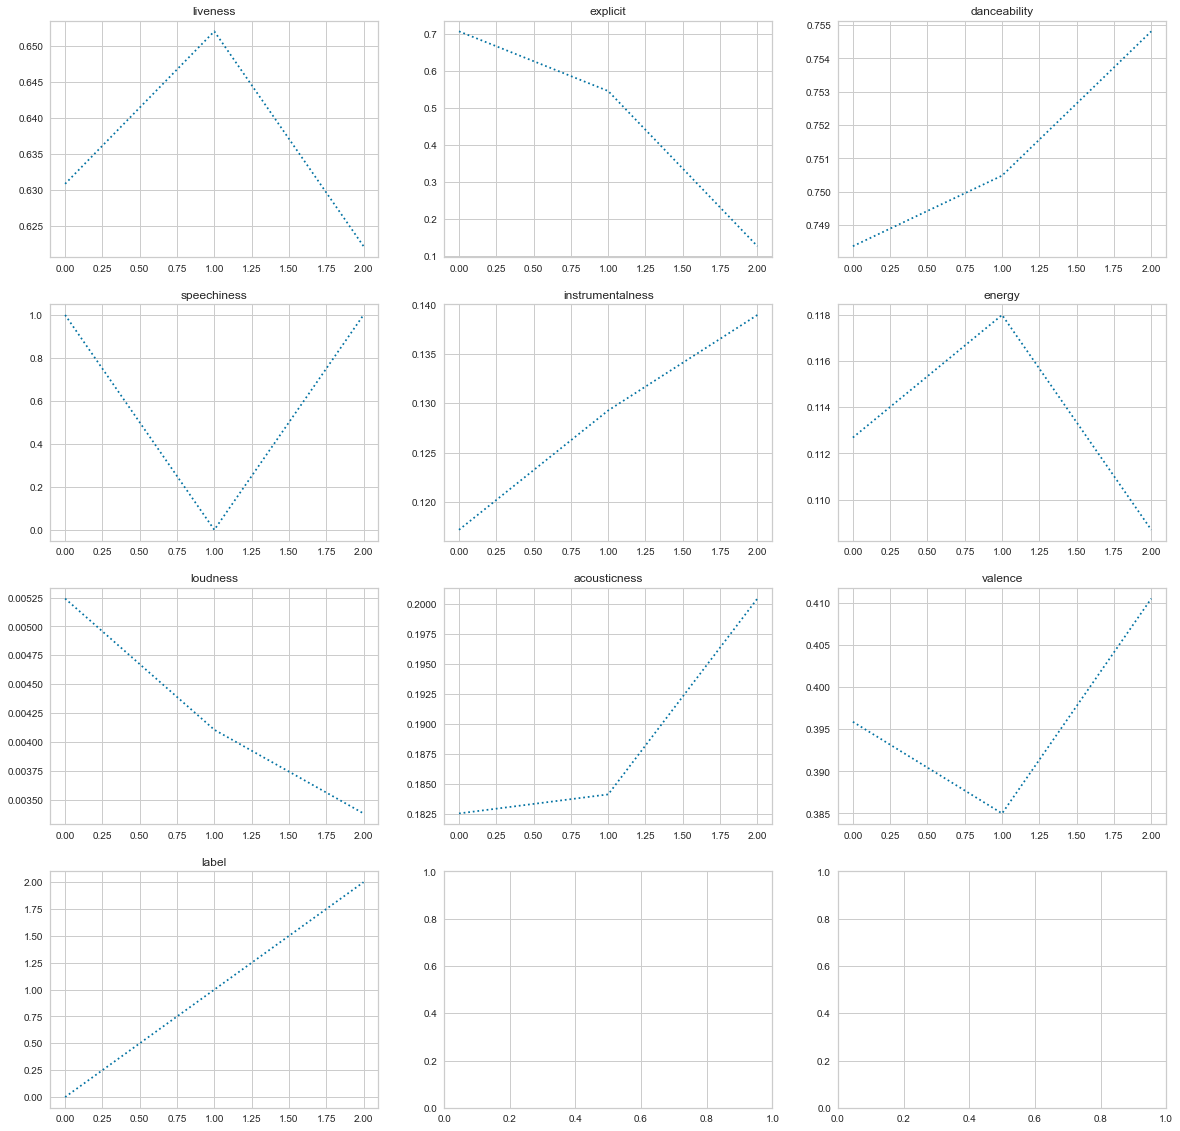

In [42]:
clusterCenters.reset_index(inplace=True)
clusterCenters.drop(['index'], axis=1, inplace=True)
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
i = 0
j = 0
for col in clusterCenters.columns:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title = col)
    ax[i, j].plot(clusterCenters[col], linestyle = 'dotted')
    j += 1